In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import csv
#from tree_vis import *
import random

In [2]:
data = pd.read_csv('NewMeander.csv')

In [3]:
data

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,H1,mea1-H1.jpg,59,1,M,R,58,7434.180108,10120.222430,42913.38070,0.071112,48.761320,203.049894,0.119590,2236.376294,0.114428
1,H2,mea1-H2.jpg,76,1,M,R,60,10132.444470,11923.713750,64317.66969,0.581945,31.231012,212.489845,0.029351,1658.672664,0.064394
2,H3,mea1-H3.jpg,301,1,F,R,56,5320.969169,8443.270014,39979.95076,0.000388,54.281633,227.843584,0.757457,3148.250320,0.158879
3,H4,mea1-H4.jpg,102,1,M,R,24,8659.652924,13558.029200,69319.27081,0.008113,52.104352,185.538482,0.220402,2606.647576,0.127358
4,H5,mea1-H5.jpg,305,1,M,R,79,7293.018199,7531.636413,34595.02260,0.102315,40.991308,198.680893,0.071312,3193.983137,0.155660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,P28,mea4-P28.jpg,176,2,F,R,63,4649.013546,7210.680410,45049.68241,0.032364,19.834001,214.707643,0.191509,671.570304,0.126623
260,P29,mea4-P29.jpg,181,2,F,R,62,5606.216748,6911.437880,33526.40980,0.000000,19.501336,133.597316,0.000000,580.637851,0.179402
261,P30,mea4-P30.jpg,230,2,M,R,52,4433.787806,6608.087204,42560.10992,2.717939,20.960257,174.983694,0.000000,645.048946,0.193038
262,P31,mea4-P31.jpg,138,2,F,R,53,3572.255813,6348.101783,57076.62706,0.002953,18.403387,188.995541,0.337134,571.027427,0.101695


In [4]:
data = data.drop(columns=['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT'])

In [5]:
data

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,1,M,R,58,7434.180108,10120.222430,42913.38070,0.071112,48.761320,203.049894,0.119590,2236.376294,0.114428
1,1,M,R,60,10132.444470,11923.713750,64317.66969,0.581945,31.231012,212.489845,0.029351,1658.672664,0.064394
2,1,F,R,56,5320.969169,8443.270014,39979.95076,0.000388,54.281633,227.843584,0.757457,3148.250320,0.158879
3,1,M,R,24,8659.652924,13558.029200,69319.27081,0.008113,52.104352,185.538482,0.220402,2606.647576,0.127358
4,1,M,R,79,7293.018199,7531.636413,34595.02260,0.102315,40.991308,198.680893,0.071312,3193.983137,0.155660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2,F,R,63,4649.013546,7210.680410,45049.68241,0.032364,19.834001,214.707643,0.191509,671.570304,0.126623
260,2,F,R,62,5606.216748,6911.437880,33526.40980,0.000000,19.501336,133.597316,0.000000,580.637851,0.179402
261,2,M,R,52,4433.787806,6608.087204,42560.10992,2.717939,20.960257,174.983694,0.000000,645.048946,0.193038
262,2,F,R,53,3572.255813,6348.101783,57076.62706,0.002953,18.403387,188.995541,0.337134,571.027427,0.101695


In [6]:
data['CLASS_TYPE'] = data['CLASS_TYPE'].map({1:0, 2:1})
data['GENDER'] = data['GENDER'].map({'M': 0, 'F': 1})
data['RIGH/LEFT-HANDED'] = data['RIGH/LEFT-HANDED'].map({'R': 0, 'L': 1})

In [7]:
data

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,0,0,0,58,7434.180108,10120.222430,42913.38070,0.071112,48.761320,203.049894,0.119590,2236.376294,0.114428
1,0,0,0,60,10132.444470,11923.713750,64317.66969,0.581945,31.231012,212.489845,0.029351,1658.672664,0.064394
2,0,1,0,56,5320.969169,8443.270014,39979.95076,0.000388,54.281633,227.843584,0.757457,3148.250320,0.158879
3,0,0,0,24,8659.652924,13558.029200,69319.27081,0.008113,52.104352,185.538482,0.220402,2606.647576,0.127358
4,0,0,0,79,7293.018199,7531.636413,34595.02260,0.102315,40.991308,198.680893,0.071312,3193.983137,0.155660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,1,0,63,4649.013546,7210.680410,45049.68241,0.032364,19.834001,214.707643,0.191509,671.570304,0.126623
260,1,1,0,62,5606.216748,6911.437880,33526.40980,0.000000,19.501336,133.597316,0.000000,580.637851,0.179402
261,1,0,0,52,4433.787806,6608.087204,42560.10992,2.717939,20.960257,174.983694,0.000000,645.048946,0.193038
262,1,1,0,53,3572.255813,6348.101783,57076.62706,0.002953,18.403387,188.995541,0.337134,571.027427,0.101695


In [8]:
def get_average_performance(features, labels, writer):
    est_list = [100, 150, 200, 250, 300]
    depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    max_acc = -1.0
    best_est = None

    for x in depth_list:
        for y in est_list:
            # split into train test
            x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
            forest = RandomForestClassifier(n_estimators=y, max_depth=x, bootstrap=False, min_samples_split=2, min_samples_leaf=1)
            forest.fit(x_train, y_train)
            c_val_score = np.mean(cross_val_score(forest, x_train, y_train, cv=10))
                
            # get predictions
            y_pred = forest.predict(x_test)

            # get confusion matrix
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # calculate accuracy, specificity, & sensitivity
            accuracy = c_val_score
            specificity = tn / (tn + fp)
            sensitivity = tp / (tp + fn)

            if accuracy > max_acc:
                best_est = forest
            
            writer.writerow([x, y, accuracy, specificity, sensitivity])
    return best_est

In [9]:
features = data.loc[:, data.columns != 'CLASS_TYPE']
labels = data['CLASS_TYPE']

INDICES: [ 1  0  6  8  5 11  9  4  3 10  7  2]
FEATURES: Index(['GENDER', 'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')


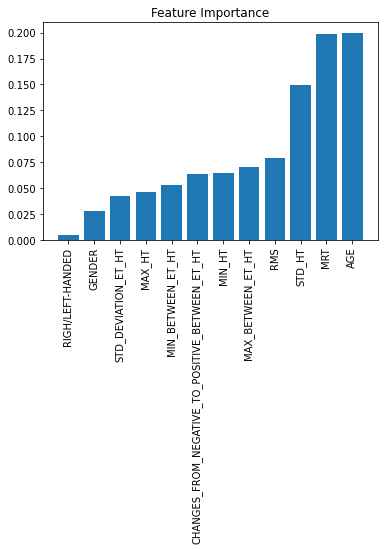

In [10]:
f = open('results-2.csv', 'w')
writer = csv.writer(f)
writer.writerow(['max_depth','n_estimators','accuracy','specificity','sensitivity'])
model = get_average_performance(features, labels, writer)

#feature importance
sorted_indices = model.feature_importances_.argsort()
plt.title('Feature Importance')
print('INDICES:', sorted_indices)
print('FEATURES:', features.columns)
feat_names = [features.columns[i] for i in sorted_indices]
plt.bar(feat_names, model.feature_importances_[sorted_indices])
plt.xticks(rotation=90)
plt.show()

f.close()

In [21]:
results = pd.read_csv('results-2.csv')

In [22]:
results

,max_depth,n_estimators,accuracy,specificity,sensitivity
0,1,100,0.791558,0.750000,0.840000
1,1,150,0.796753,0.687500,0.857143
2,1,200,0.767965,0.785714,0.960000
3,1,250,0.796320,0.645161,0.818182
4,1,300,0.773160,0.620690,1.000000
5,2,100,0.781602,0.818182,0.950000
6,2,150,0.805411,0.741935,0.772727
7,2,200,0.814935,0.703704,0.884615
8,2,250,0.805195,0.758621,0.875000
9,2,300,0.848052,0.740741,0.846154


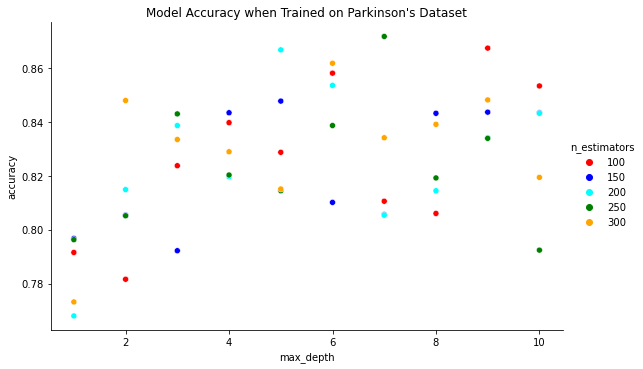

In [25]:
unsampled = pd.read_csv("results.csv")

# Map color to the number of estimators
n_est = [100, 150, 200, 250, 300]
color_map = {100: "red", 150: "blue", 200: "cyan", 250: "green", 300: "orange"}

# Create plot for max_depth, n_estimators, & accuracy for sampled and unsampled features
sns.relplot(data=unsampled, x='max_depth', y='accuracy', hue='n_estimators', palette=color_map, hue_order=n_est, aspect=1.61)
plt.title('Model Accuracy when Trained on Parkinson\'s Dataset')
plt.show()